In [73]:
# source: https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html

import matplotlib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
    

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            value = ""
            if data[i, j] != 0:
                value = valfmt(data[i, j], None)
            else:
                value = ""
            text = im.axes.text(j, i, value, **kw)
            texts.append(text)

    return texts

In [74]:
df = pd.read_csv('analyse_data/IV-correlation.csv', index_col=False)
mask = np.triu(np.ones_like(df, dtype=bool), k=1)
result = df.where(mask)

result.drop(result.columns[0], axis=1, inplace=True)
result = result.iloc[:-1]

# result = df

Index(['conscientiousness', 'neuroticism', 'extraversion', 'agreeableness'], dtype='object')


C:\Users\xchen\.virtualenvs\INFOMQNM-Project-AQz3gs5P\Lib\site-packages\matplotlib\colors.py:1352: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
C:\Users\xchen\.virtualenvs\INFOMQNM-Project-AQz3gs5P\Lib\site-packages\matplotlib\colors.py:1359: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)


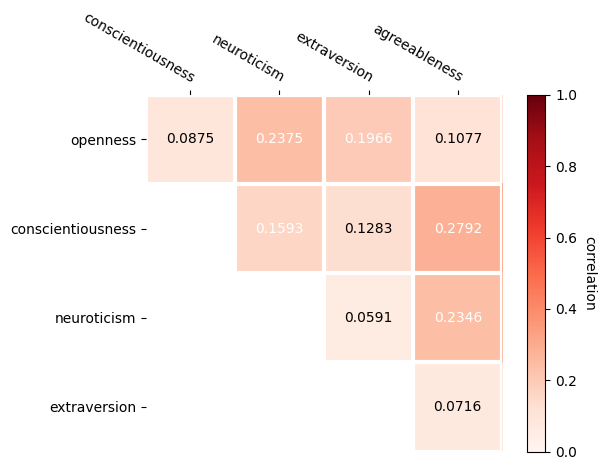

In [79]:
fig, ax = plt.subplots()
print(result.columns)
im, cbar = heatmap(np.abs(result), df.columns[:-1], result.columns, ax=ax,
                   cmap="Reds", cbarlabel="correlation", vmin=0, vmax=1)
texts = annotate_heatmap(im, valfmt="{x:.4f}")

fig.tight_layout()
plt.show()